In [ ]:
#File used for data visualisation.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('kc_house_data.csv')

In [2]:
null_values = df.isnull().sum()

print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [3]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


In [4]:
df = df.drop(df.columns[[12, 13]], axis=1) #Dropping latitude and longitude
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,2390,7570


In [5]:
columns_to_print = [df.columns[0], df.columns[2]]
print(df[columns_to_print])

          price  bathrooms
0      221900.0       1.00
1      538000.0       2.25
2      180000.0       1.00
3      604000.0       3.00
4      510000.0       2.00
...         ...        ...
21608  360000.0       2.50
21609  400000.0       2.50
21610  402101.0       0.75
21611  400000.0       2.50
21612  325000.0       0.75

[21613 rows x 2 columns]


In [6]:
#Task 3
# Splitting the data into two halves by rows
row_half = len(df) // 2
first_half_rows = df[:row_half]
second_half_rows = df[row_half:]

# Splitting the data into two halves by columns
column_half = len(df.columns) // 2
first_half_cols = df.iloc[:, :column_half]
second_half_cols = df.iloc[:, column_half:]

In [7]:
#Task 4
columns_to_analyze = df.columns[0:14]

# Calculate the max, min, median, and mode for the specified columns
max_values = df[columns_to_analyze].max()
min_values = df[columns_to_analyze].min()
median_values = df[columns_to_analyze].median()
mode_values = df[columns_to_analyze].mode().iloc[0]  # Mode can have multiple values, so we take the first one
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Maximum values:")
print(max_values)

print("\nMinimum values:")
print(min_values)

print("\nMedian values:")
print(median_values)

print("\nMode values:")
print(mode_values)

Maximum values:
price           7700000.000
bedrooms             33.000
bathrooms             8.000
sqft_living       13540.000
sqft_lot        1651359.000
floors                3.500
condition             5.000
grade                13.000
sqft_above         9410.000
sqft_basement      4820.000
yr_built           2015.000
yr_renovated       2015.000
sqft_living15      6210.000
sqft_lot15       871200.000
dtype: float64

Minimum values:
price           75000.000
bedrooms            0.000
bathrooms           0.000
sqft_living       290.000
sqft_lot          520.000
floors              1.000
condition           1.000
grade               1.000
sqft_above        290.000
sqft_basement       0.000
yr_built         1900.000
yr_renovated        0.000
sqft_living15     399.000
sqft_lot15        651.000
dtype: float64

Median values:
price           450000.000
bedrooms             3.000
bathrooms            2.250
sqft_living       1910.000
sqft_lot          7618.000
floors               1.500
con

In [8]:
# Task 5

string_columns = df.select_dtypes(include='object')

for col in string_columns.columns:
    unique_values = df[col].unique()
    value_map = {value: i for i, value in enumerate(unique_values)}
    df[col] = df[col].map(value_map)


print(df)

           price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     221900.000         3      1.000         1180      5650   1.000   
1     538000.000         3      2.250         2570      7242   2.000   
2     180000.000         2      1.000          770     10000   1.000   
3     604000.000         4      3.000         1960      5000   1.000   
4     510000.000         3      2.000         1680      8080   1.000   
...          ...       ...        ...          ...       ...     ...   
21608 360000.000         3      2.500         1530      1131   3.000   
21609 400000.000         4      2.500         2310      5813   2.000   
21610 402101.000         2      0.750         1020      1350   2.000   
21611 400000.000         3      2.500         1600      2388   2.000   
21612 325000.000         2      0.750         1020      1076   2.000   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0              3      7        1180              0      1

In [11]:
# Task 6
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('kc_house_data.csv')
df = df.drop(df.columns[[12, 13]], axis=1) #Dropping latitude and longitude
numerical_columns = df.select_dtypes(include='number')
scaler = MinMaxScaler()
numerical_columns_normalized = pd.DataFrame(scaler.fit_transform(numerical_columns), columns=numerical_columns.columns)

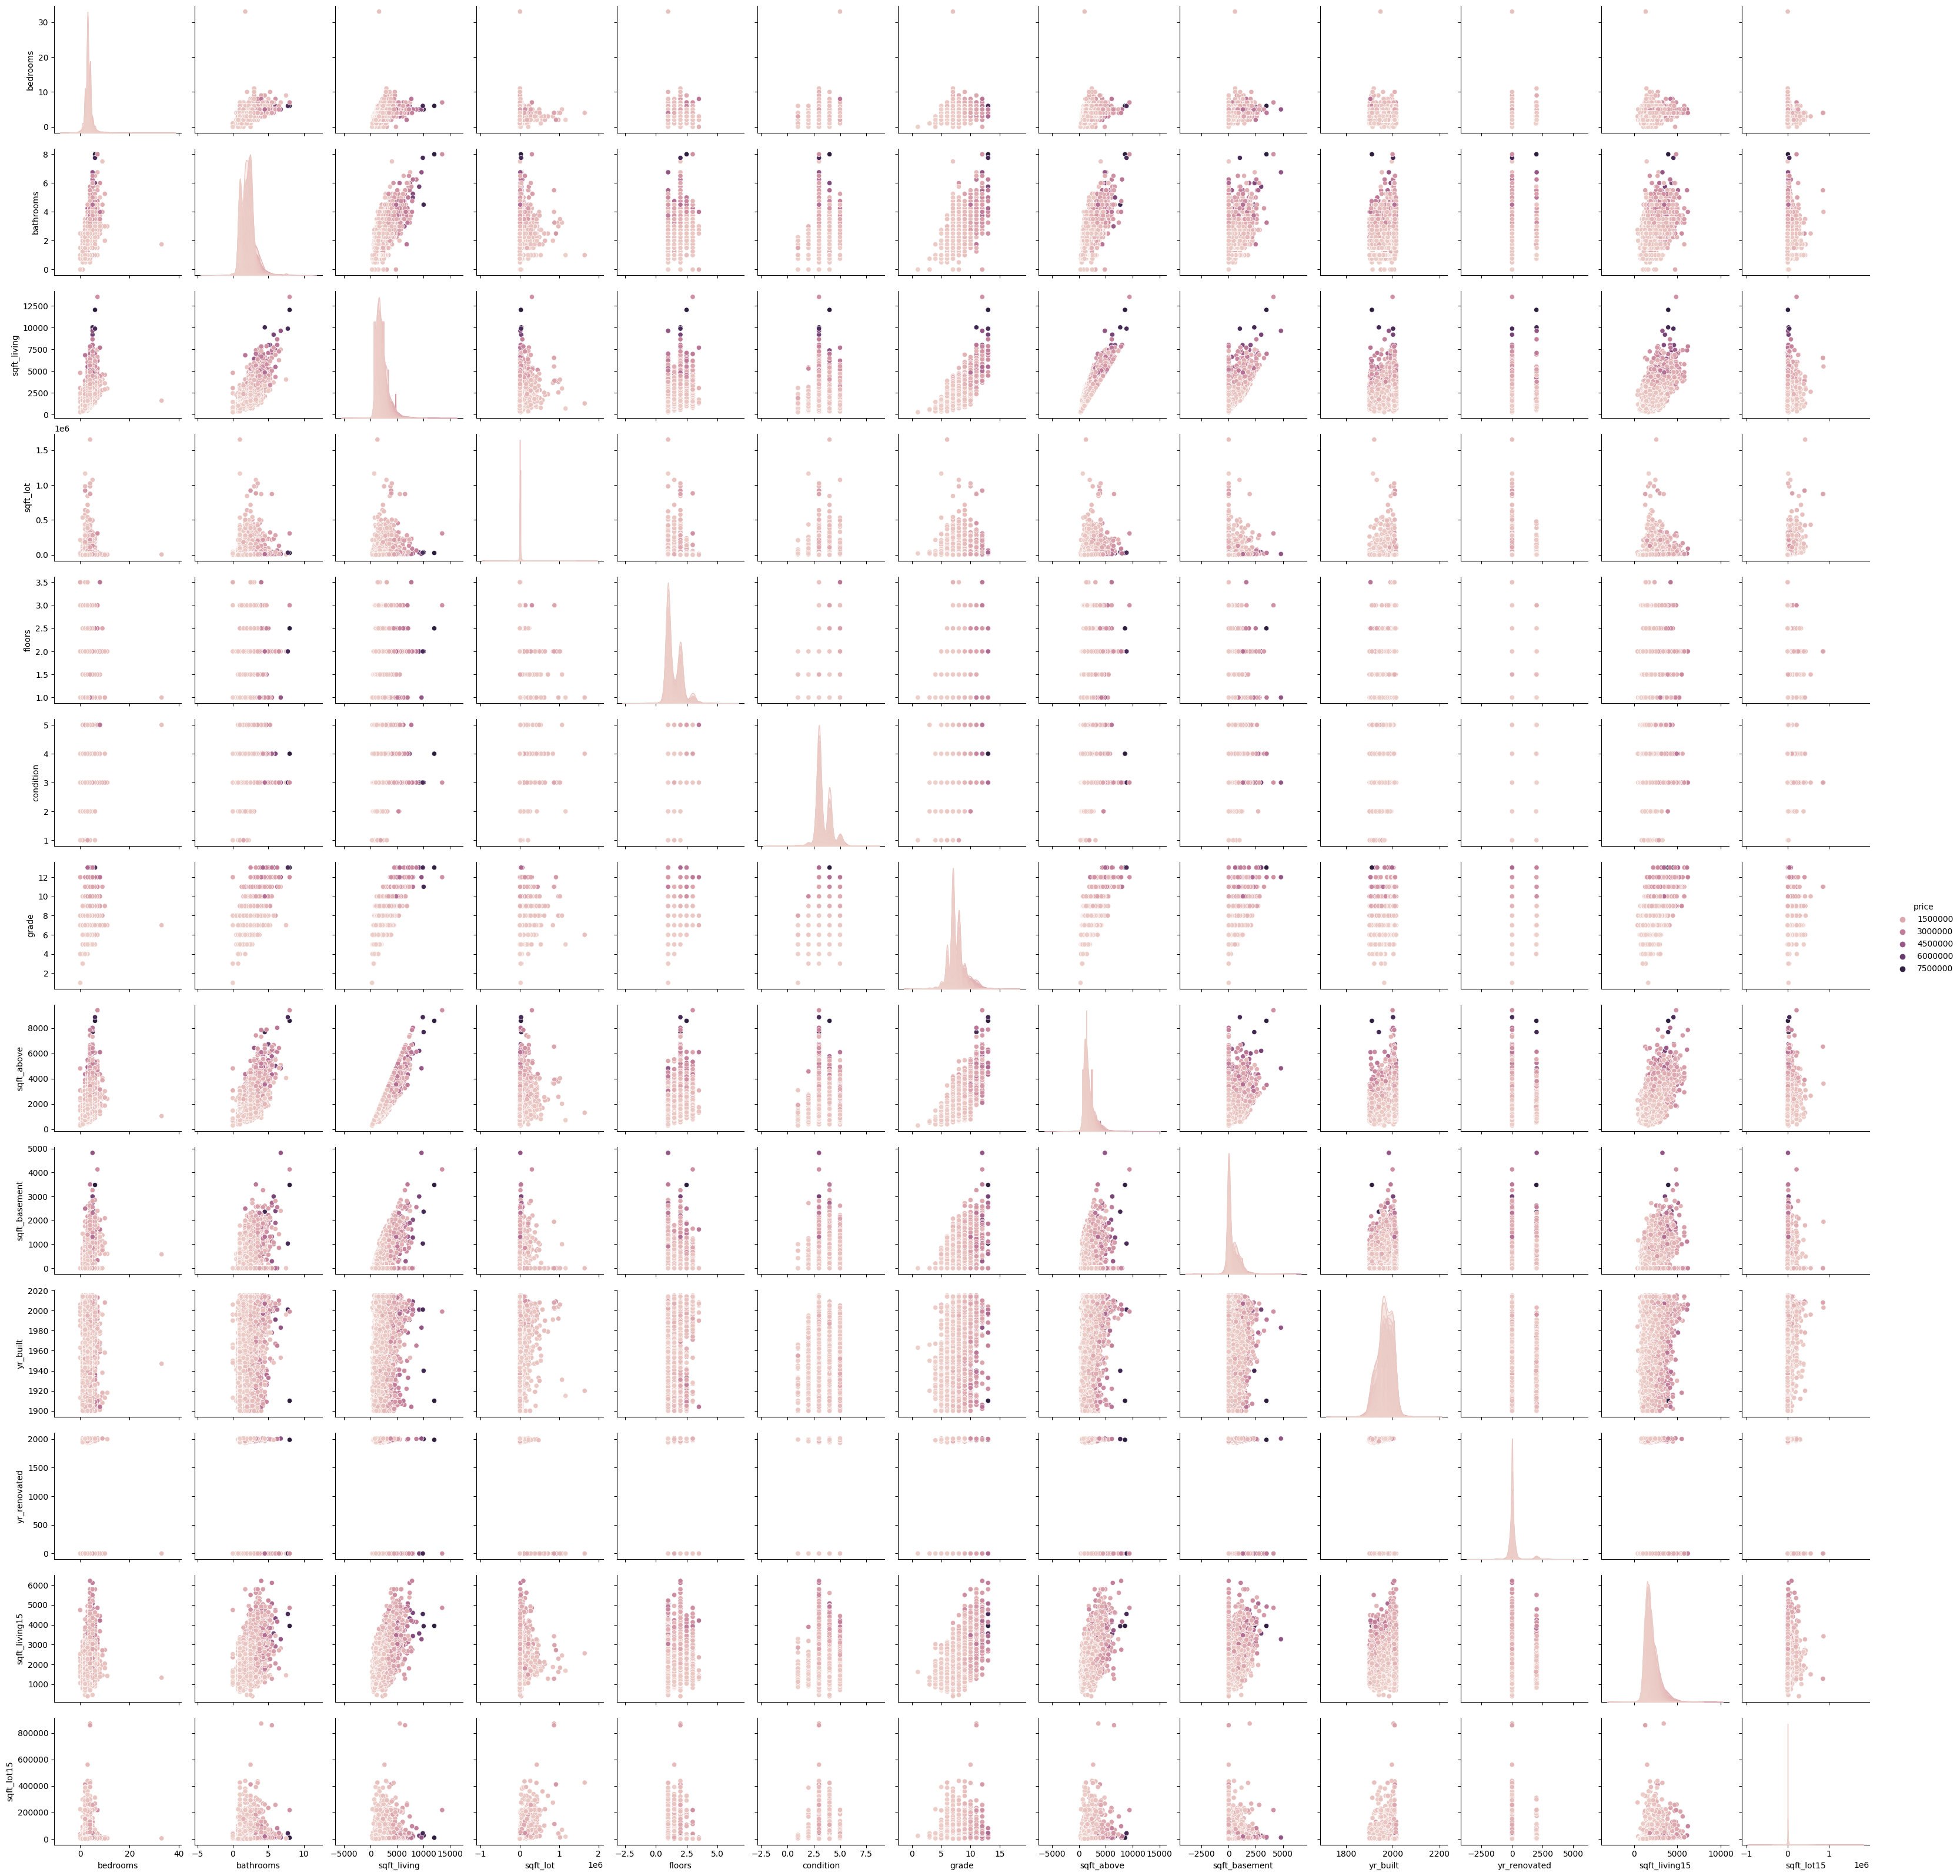

In [12]:
#Task 7
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'hue_column' with the column you want to use for hue-based categorization
hue_column = 'price'

# Creating the pairplots
sns.pairplot(df, hue=hue_column)
plt.show()